## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [133]:
! git clone https://www.github.com/carascott/kmc

fatal: destination path 'kmc' already exists and is not an empty directory.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [135]:
# Q1-1
# Price cleaning
df = pd.read_csv('/content/kmc/data/airbnb_hw.csv')
print(df.columns)

df['price'] = df['Price'].str.replace(',','') # get rid of commas
df['price'] = pd.to_numeric(df['price'], errors='coerce')
# new column created for cleaned variable

for value, count in df['price'].value_counts().items():
    print(f"{value}: {count} times")

nan_count = df['price'].isna().sum()
print(f"nans:{nan_count}")

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
150: 1481 times
100: 1207 times
200: 1059 times
125: 889 times
75: 873 times
80: 798 times
250: 747 times
120: 743 times
90: 729 times
70: 711 times
175: 705 times
65: 696 times
60: 683 times
50: 643 times
85: 623 times
95: 558 times
99: 558 times
110: 541 times
140: 457 times
130: 457 times
160: 449 times
55: 437 times
180: 399 times
300: 397 times
225: 384 times
135: 373 times
199: 353 times
115: 334 times
45: 324 times
195: 298 times
145: 292 times
190: 267 times
89: 264 times
165: 258 times
40: 254 times
69: 251 times
185: 250 times
350: 241 times
170: 241 times
220: 234 times
149: 219 times
79: 216 times
105: 215 times
275: 203 times
59: 167 times
155: 164 times
400: 159 times
49: 148 times
129: 141 times
240: 139 times
119: 137 

In [136]:
# Beds cleaning
df['beds'] = df['Beds'].fillna(1) # Changing na's to 1 bed because there is
# obviously a bed
# New column created for cleaned variable

for value, count in df['beds'].value_counts().items():
    print(f"{value}: {count} times")
nan_count = df['beds'].isna().sum()
print(f"nans:{nan_count}") # No more NA's, 1 bed now occurs 20429 in this column


1.0: 20429 times
2.0: 6610 times
3.0: 2071 times
4.0: 783 times
5.0: 284 times
6.0: 177 times
7.0: 45 times
8.0: 24 times
10.0: 16 times
9.0: 15 times
16.0: 13 times
11.0: 5 times
12.0: 4 times
0.0: 2 times
nans:0


In [137]:
# Number of Reviews cleaning
for value, count in df['Number Of Reviews'].value_counts().items():
    print(f"{value}: {count} times")
nan_count = df['Number Of Reviews'].isna().sum()
print(f"nans:{nan_count}")
# No NAs and already numerical

0: 7814 times
1: 3572 times
2: 2457 times
3: 1764 times
4: 1382 times
5: 1072 times
6: 977 times
7: 795 times
8: 641 times
9: 631 times
10: 557 times
11: 513 times
12: 495 times
13: 414 times
14: 380 times
15: 328 times
16: 301 times
17: 281 times
18: 278 times
19: 242 times
20: 231 times
21: 217 times
22: 211 times
23: 206 times
24: 181 times
27: 171 times
25: 167 times
26: 163 times
29: 154 times
30: 152 times
31: 137 times
28: 133 times
32: 127 times
34: 118 times
33: 110 times
39: 108 times
36: 105 times
35: 101 times
37: 93 times
38: 92 times
48: 87 times
46: 82 times
41: 81 times
45: 80 times
42: 78 times
43: 76 times
40: 75 times
44: 74 times
51: 69 times
52: 69 times
47: 62 times
53: 60 times
57: 58 times
49: 54 times
55: 54 times
54: 50 times
61: 49 times
50: 44 times
59: 44 times
62: 44 times
58: 41 times
63: 40 times
56: 39 times
60: 39 times
69: 38 times
64: 34 times
80: 33 times
68: 32 times
67: 31 times
70: 29 times
66: 29 times
65: 28 times
71: 26 times
79: 26 times
76: 

In [138]:
# Review Scores Rating cleaning
for value, count in df['Review Scores Rating'].value_counts().items():
    print(f"{value}: {count} times")
nan_count = df['Review Scores Rating'].isna().sum()
print(f"nans:{nan_count}")

df['rating'] = pd.to_numeric(df['Review Scores Rating'], errors='coerce')
df.dropna(subset=['rating'], inplace=True)

nan_count = df['rating'].isna().sum()
print(f"nans:{nan_count}")
# New column created for cleaned variable

100.0: 5594 times
90.0: 1729 times
93.0: 1614 times
80.0: 1423 times
95.0: 1295 times
96.0: 1188 times
97.0: 1033 times
94.0: 943 times
92.0: 875 times
98.0: 843 times
91.0: 812 times
87.0: 714 times
88.0: 614 times
89.0: 561 times
85.0: 365 times
86.0: 348 times
99.0: 318 times
84.0: 289 times
83.0: 267 times
60.0: 244 times
82.0: 136 times
70.0: 132 times
73.0: 89 times
78.0: 84 times
77.0: 80 times
76.0: 75 times
81.0: 66 times
75.0: 60 times
40.0: 47 times
79.0: 46 times
67.0: 42 times
20.0: 39 times
72.0: 32 times
74.0: 26 times
71.0: 22 times
65.0: 21 times
68.0: 19 times
50.0: 19 times
69.0: 11 times
53.0: 8 times
63.0: 5 times
62.0: 5 times
64.0: 4 times
55.0: 3 times
47.0: 3 times
66.0: 3 times
58.0: 2 times
43.0: 2 times
57.0: 2 times
30.0: 2 times
49.0: 1 times
nans:8323
nans:0


In [139]:
df = df.loc[:,['price', 'beds', 'Number Of Reviews', 'rating']]
df.head()

,price,beds,Number Of Reviews,rating
4,549,3.0,39,96.0
5,149,1.0,4,100.0
6,250,1.0,9,100.0
7,90,1.0,80,94.0
8,270,2.0,95,90.0


In [125]:
# Q1-2
def maxmin(df):
    num = df.select_dtypes(include=[np.number]).columns
    norm = (df[num] - df[num].min()) / (df[num].max() - df[num].min())
    df = pd.concat([norm, df[df.columns.difference(num)]], axis=1)
    df = df.fillna(0)
    return df
df = maxmin(df)
df = df.rename(columns={'Number Of Reviews': 'reviews'})
# Also converting this column to make coding easier & to look nicer
print(df)

          price    beds   reviews  rating
4      0.053954  0.1875  0.148438   0.950
5      0.013914  0.0625  0.011719   1.000
6      0.024024  0.0625  0.031250   1.000
7      0.008008  0.0625  0.308594   0.925
8      0.026026  0.1250  0.367188   0.875
...         ...     ...       ...     ...
30332  0.008008  0.0625  0.000000   1.000
30347  0.005506  0.0625  0.000000   0.750
30378  0.004505  0.0625  0.000000   1.000
30404  0.005005  0.0625  0.000000   1.000
30409  0.008909  0.0625  0.000000   0.750

[22155 rows x 4 columns]


In [154]:
# Q1-3
dz = df.drop('price',axis=1) # Create NEW dataframe
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(dz)
dz['cluster'] = model.labels_
dz.describe()

,beds,Number Of Reviews,rating,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,1.556985,16.505439,91.993230,2.544708
std,1.043273,24.308241,8.850373,0.964160
min,0.000000,1.000000,20.000000,0.000000
25%,1.000000,2.000000,89.000000,2.000000
50%,1.000000,7.000000,94.000000,3.000000
75%,2.000000,20.000000,100.000000,3.000000
max,16.000000,257.000000,100.000000,5.000000


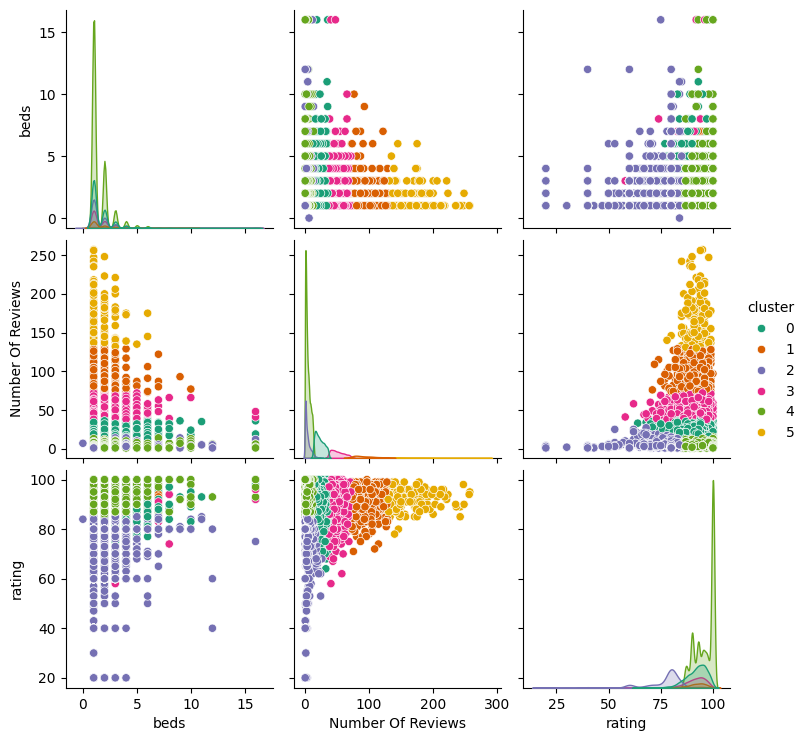

In [141]:
# Q1-4
sns.pairplot(data=dz,hue='cluster', palette='Dark2')

In [142]:
# Q1-5
df['cluster'] = model.labels_
df.loc[:,['price','cluster'] ].groupby('cluster').describe()

price                                                            
           count        mean         std   min   25%    50%     75%      max
cluster                                                                     
0         4273.0  161.712380  193.531253  20.0  88.0  135.0  195.00  10000.0
1          748.0  134.442513   84.012800  27.0  80.0  110.0  165.00    875.0
2         2921.0  138.445395  160.800989  21.0  70.0  105.0  170.00   5000.0
3         1913.0  147.085729   96.057748  22.0  89.0  125.0  180.00   1500.0
4        12154.0  159.088777  137.526698  10.0  85.0  130.0  195.00   4500.0
5          146.0  126.171233   71.032519  33.0  79.0  112.5  163.75    550.0

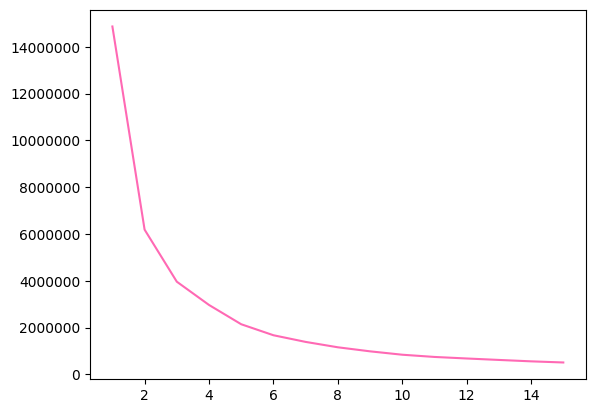

In [156]:
# Q1-6
kbar = 15
kgrid = np.arange(1,kbar+1)
SSE = np.zeros(kbar)
for k in range(kbar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(df)
    SSE[k] = model.inertia_
sns.lineplot(x=kgrid, y=SSE, color="hotpink") # le8 ? no. get rid of it.
plt.ticklabel_format(style='plain', axis='y')

price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0         3825.0  152.325229  107.083421  22.0  89.0  128.0  185.0   1500.0
1        17436.0  156.440239  158.934224  10.0  85.0  127.5  192.0  10000.0
2          894.0  133.091723   82.053778  27.0  80.0  110.0  165.0    875.0

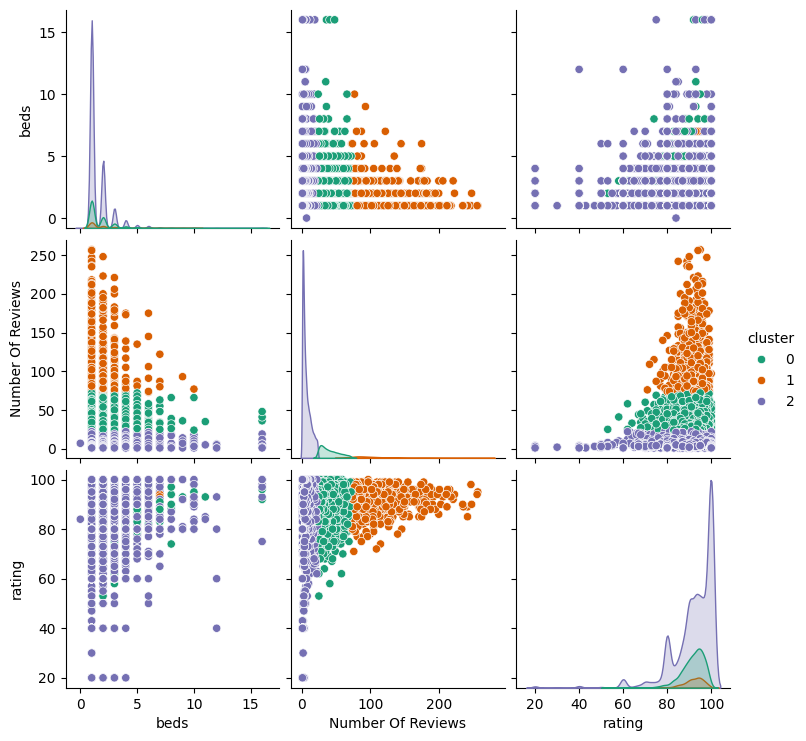

In [158]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(dz)
df['cluster'] = model.labels_

sns.pairplot(data = dz, hue = 'cluster', palette="Dark2")

df['cluster'] = model.labels_
df.loc[:,['price','cluster'] ].groupby('cluster').describe()

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [160]:
# Q2-1
# Provided code
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

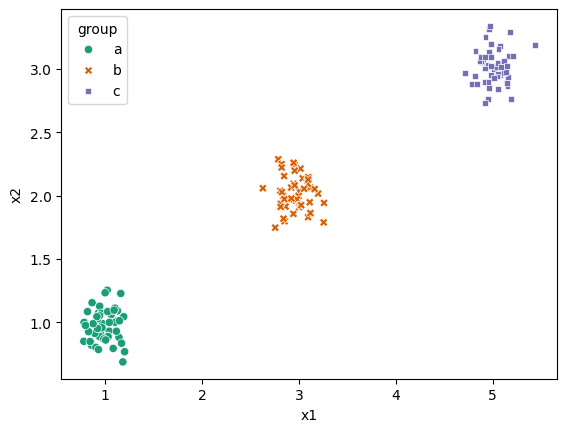

In [162]:
#Q2-2
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group',
                palette="Dark2")

<Axes: xlabel='x1', ylabel='x2'>

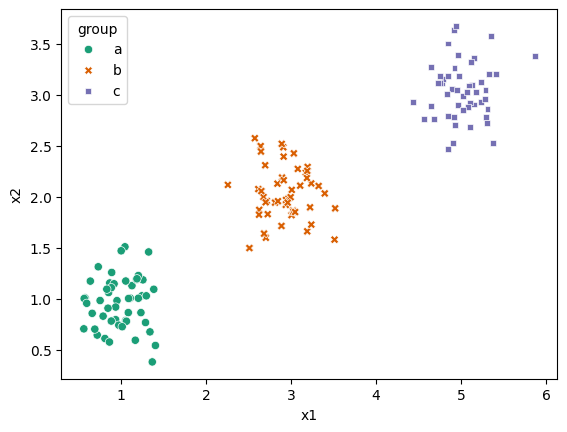

In [163]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group',
                palette="Dark2")

<Axes: xlabel='x1', ylabel='x2'>

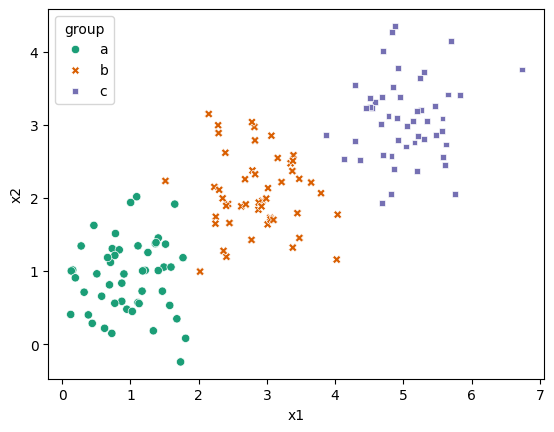

In [164]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group',
                palette="Dark2")

<Axes: xlabel='x1', ylabel='x2'>

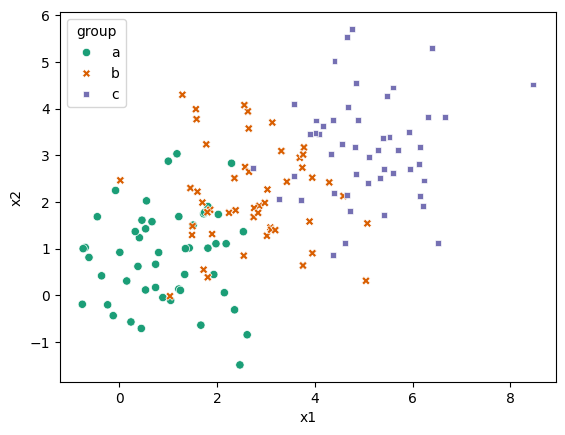

In [165]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group',
                palette="Dark2")

<Axes: xlabel='x1', ylabel='x2'>

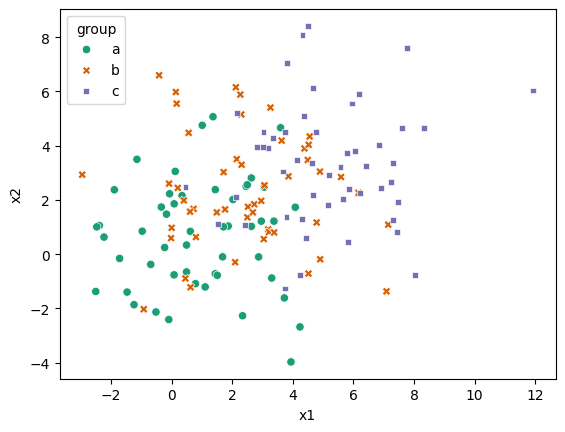

In [166]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group',
                palette="Dark2")
# At .25 the clusters are distinct and seperated. As the noise increases
# the points become closer together. When noise is at 2, the points have all mixed.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?